# Land's End To John O'Groats Analysis

In Summer 2023, I completed a walk from one end of the UK to the other. This is a quick look at the stats!

# Table of Contents

1. [Introduction](#intro)
2. [Dataset](#data)
3. [Loading Modules and data](#loading)
4. [Data Cleaning](#cleaning)

# Introduction <a name="intro"></a>

# Dataset <a name="data"></a>

# Loading modules and data <a name="loading"></a>


In [233]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [234]:
df_overview = pd.read_csv("overview.csv")
df_counts = pd.read_csv("counts.csv")

In [235]:
df_overview.head()

,Day,Days Left,Unnamed: 2,Date,Day.1,Start,End,Distance (km),Total (km),Distance (mi),Total (mi),Assistance,Notes,Unnamed: 13,Unnamed: 14
0,0.0,NaN,NaN,17/05/2023,Wed,-,-,-,-,-,-,Mum/Dad,Travel Day,NaN,NaN
1,1.0,113.0,0%,18/05/2023,Thu,Land's End,Penzance,23,23,14.3,14.3,Mum/Dad,NaN,NaN,NaN
2,2.0,112.0,2%,19/05/2023,Fri,Penzance,Helston/Porthleven,25,48,15.5,29.8,Mum/Dad,to helston (25km) or to porthleven (22km) hilly!,NaN,NaN
3,3.0,111.0,3%,20/05/2023,Sat,Helston/Porthleven,Lizard,23,71,14.3,44.1,Mum/Dad,NaN,NaN,NaN
4,4.0,110.0,3%,21/05/2023,Sun,Lizard,Gweek,21.8,92.8,13.5,57.7,Mum/Dad,NaN,NaN,NaN


In [236]:
df_counts.head()

,Day,Date,Day.1,Start,End,Km,Weather,Steps,Stiles,Dog petting,Cat stroking,Cow encounters,Unnamed: 12,Mood,Cries,Chickens,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3157177.0,243.0,94.0,11.0,6.0,NaN,NaN,25.0,NaN,NaN
1,0.0,17/05/2023,Wed,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,18/05/2023,Thu,Land's End,Penzance,23,Sunny/cloudy,30982.0,6.0,5.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN
3,2.0,19/05/2023,Fri,Penzance,Helston/Porthleven,25,Cloudy,35306.0,4.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,cornwall
4,3.0,20/05/2023,Sat,Helston/Porthleven,Lizard,23,Blue skies,37643.0,9.0,3.0,0.0,0.0,NaN,NaN,0.0,NaN,devon


# Data Cleaning <a name="cleaning"></a>

In [237]:
#remove first row of counts dataframe 
df_counts = df_counts.drop([0],axis=0)
df_counts.reset_index(drop=True, inplace=True)
df_counts.head()

,Day,Date,Day.1,Start,End,Km,Weather,Steps,Stiles,Dog petting,Cat stroking,Cow encounters,Unnamed: 12,Mood,Cries,Chickens,Unnamed: 16
0,0.0,17/05/2023,Wed,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,18/05/2023,Thu,Land's End,Penzance,23,Sunny/cloudy,30982.0,6.0,5.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN
2,2.0,19/05/2023,Fri,Penzance,Helston/Porthleven,25,Cloudy,35306.0,4.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,cornwall
3,3.0,20/05/2023,Sat,Helston/Porthleven,Lizard,23,Blue skies,37643.0,9.0,3.0,0.0,0.0,NaN,NaN,0.0,NaN,devon
4,4.0,21/05/2023,Sun,Lizard,Gweek,21.8,Blue skies,31287.0,2.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,somerset


Join the two dataframes into one

In [238]:
# Join the two dataframes into one
df = pd.concat([df_overview, df_counts], axis=1)

In [240]:
#remove duplicate columns
df = df.loc[:,~df.columns.duplicated()].copy()

In [241]:
df.columns

Index(['Day', 'Days Left', 'Unnamed: 2', 'Date', 'Day.1', 'Start', 'End',
       'Distance (km)', 'Total (km)', 'Distance (mi)', 'Total (mi)',
       'Assistance', 'Notes', 'Unnamed: 13', 'Unnamed: 14', 'Km', 'Weather',
       'Steps', 'Stiles', 'Dog petting', 'Cat stroking', 'Cow encounters',
       'Unnamed: 12', 'Mood', 'Cries', 'Chickens', 'Unnamed: 16'],
      dtype='object')

In [242]:
# drop unneeded columns
df = df.drop(['Unnamed: 2','Unnamed: 13','Unnamed: 14','Unnamed: 16','Unnamed: 12','Notes','Mood','Days Left',
              'Km','Assistance'],axis=1)

In [243]:
# rename columns into more useful names
df = df.rename(columns={"Day.1": "Day_week","Day": "Day_number",'Dog petting':"Dogs","Cat stroking":"Cats",
                        "Cow encounters":"Cow_encounters","Distance (km)":"Distance_km","Total (km)":"Total_km",
                        "Distance (mi)":"Distance_miles","Total (mi)": "Total_miles"})

In [245]:
# drop trailing rows
df = df[df['Start'].notna()]

In [246]:
#remove first row containing travel day
df = df.drop([0],axis=0)
df.reset_index(drop=True, inplace=True)

In [247]:
df

,Day_number,Date,Day_week,Start,End,Distance_km,Total_km,Distance_miles,Total_miles,Weather,Steps,Stiles,Dogs,Cats,Cow_encounters,Cries,Chickens
0,1.0,18/05/2023,Thu,Land's End,Penzance,23,23,14.3,14.3,Sunny/cloudy,30982.0,6.0,5.0,1.0,0.0,0.0,NaN
1,2.0,19/05/2023,Fri,Penzance,Helston/Porthleven,25,48,15.5,29.8,Cloudy,35306.0,4.0,1.0,0.0,0.0,0.0,NaN
2,3.0,20/05/2023,Sat,Helston/Porthleven,Lizard,23,71,14.3,44.1,Blue skies,37643.0,9.0,3.0,0.0,0.0,0.0,NaN
3,4.0,21/05/2023,Sun,Lizard,Gweek,21.8,92.8,13.5,57.7,Blue skies,31287.0,2.0,0.0,0.0,0.0,0.0,NaN
4,5.0,22/05/2023,Mon,Gweek-ish,Falmouth,18.5,111.3,11.5,69.2,sunny/cloudy,25150.0,13.0,1.0,0.0,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,108.0,02/09/2023,Sat,Helmsdale,Berriedale,19,2088,11.8,1297.4,"light cloud, sunny, sea mist",26508.0,13.0,NaN,NaN,NaN,NaN,NaN
108,109.0,03/09/2023,Sun,Berriedale,Lybster,21,2109,13.0,1310.5,"light cloud, sunny",27753.0,NaN,NaN,NaN,NaN,NaN,NaN
109,110.0,04/09/2023,Mon,Lybster,Reiss,32,2141,19.9,1330.4,sunny,42963.0,NaN,5.0,NaN,NaN,NaN,NaN
110,111.0,05/09/2023,Tue,Reiss,John O'Groats,29,2170,18.0,1348.4,"grey, drizzle, foggy",37899.0,1.0,1.0,NaN,NaN,NaN,NaN


In [256]:
#fill NaNs with 0 in counts
df = df.fillna(0)

In [257]:
# replace Rest days with zeros so that it can be used as integers
df['Distance_km'] = df['Distance_km'].apply(lambda x: 0 if 'rest' in x.lower() else x)
df['Distance_miles'] = df['Distance_miles'].apply(lambda x: 0 if 'rest' in x.lower() else x)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Day_number      112 non-null    float64
 1   Date            112 non-null    object 
 2   Day_week        112 non-null    object 
 3   Start           112 non-null    object 
 4   End             112 non-null    object 
 5   Distance_km     112 non-null    object 
 6   Total_km        112 non-null    object 
 7   Distance_miles  112 non-null    object 
 8   Total_miles     112 non-null    object 
 9   Weather         112 non-null    object 
 10  Steps           112 non-null    float64
 11  Stiles          112 non-null    float64
 12  Dogs            112 non-null    float64
 13  Cats            112 non-null    float64
 14  Cow_encounters  112 non-null    float64
 15  Cries           112 non-null    float64
 16  Chickens        112 non-null    object 
 17  rain            112 non-null    int

In [262]:
#convert distances to floats
df["Distance_km"] = df["Distance_km"].astype('float')
df["Distance_miles"] = df["Distance_miles"].astype('float')
df["Total_km"] = df["Total_km"].astype('float')
df["Total_miles"] = df["Total_miles"].astype('float')

## Creating new features <a name="features"></a>

The weather column is currently full of strings in not very useful formats (different phrasing, descriptions etc). Let's pull out some keywords from this and create columns representing different weather states. 

In [259]:
df['rain'] = df['Weather'].apply(lambda x: 1 if 'rain' in x.lower() or 'showers' in x.lower() else 0)
df['sun'] = df['Weather'].apply(lambda x: 1 if 'sun' in x.lower() or 'blue' in x.lower() else 0)
df['cloud'] = df['Weather'].str.lower().apply(lambda x: 1 if 'cloud' in x.lower() or 'grey' in x.lower() else 0)

In [263]:
df.head()

,Day_number,Date,Day_week,Start,End,Distance_km,Total_km,Distance_miles,Total_miles,Weather,Steps,Stiles,Dogs,Cats,Cow_encounters,Cries,Chickens,rain,sun,cloud
0,1.0,18/05/2023,Thu,Land's End,Penzance,23.0,23.0,14.3,14.3,Sunny/cloudy,30982.0,6.0,5.0,1.0,0.0,0.0,0,0,1,1
1,2.0,19/05/2023,Fri,Penzance,Helston/Porthleven,25.0,48.0,15.5,29.8,Cloudy,35306.0,4.0,1.0,0.0,0.0,0.0,0,0,0,1
2,3.0,20/05/2023,Sat,Helston/Porthleven,Lizard,23.0,71.0,14.3,44.1,Blue skies,37643.0,9.0,3.0,0.0,0.0,0.0,0,0,1,0
3,4.0,21/05/2023,Sun,Lizard,Gweek,21.8,92.8,13.5,57.7,Blue skies,31287.0,2.0,0.0,0.0,0.0,0.0,0,0,1,0
4,5.0,22/05/2023,Mon,Gweek-ish,Falmouth,18.5,111.3,11.5,69.2,sunny/cloudy,25150.0,13.0,1.0,0.0,1.0,2.0,0,0,1,1


# Exploratory Data Analysis <a name="EDA"></a>

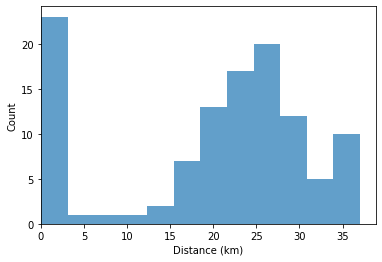

In [502]:
plt.hist(df.Distance_km,bins=12,alpha=0.7)
plt.xlim(0,)
plt.xlabel("Distance (km)")
plt.ylabel("Count");

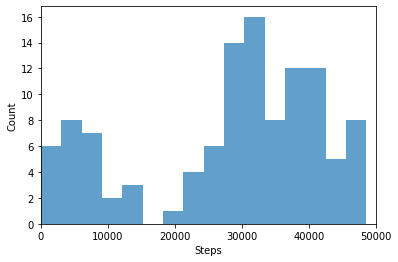

In [503]:
plt.hist(df.Steps,bins=16,alpha=0.7)
plt.xlim(0,50000)
plt.xlabel("Steps")
plt.ylabel("Count");

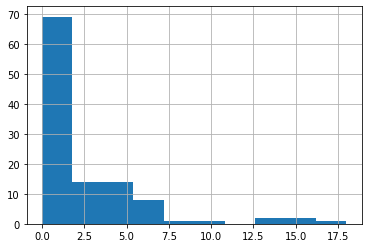

In [335]:
df.Stiles.hist()

Text(0.5, 0, 'Day')

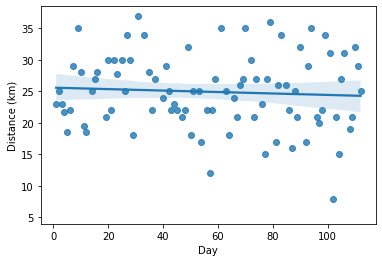

In [333]:
sns.regplot(data=df[df.Distance_km>5],x="Day_number",y="Distance_km")
plt.ylim(4,)
plt.ylabel("Distance (km)")
plt.xlabel("Day");

Remarkably consistent. I expected that maybe there would be a slight upward trend as I got fitter but clearly not. Though subjectively, while I may not have been walking further each day, it definitely got easier!

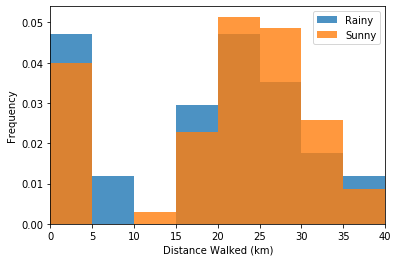

In [384]:
rainy_days_df = df[df["rain"] == 1]
sunny_days_df = df[df["sun"] == 1]
cloudy_days_df = df[df["cloud"] == 1]

plt.hist(rainy_days_df["Distance_km"], bins=8,range=(0,40),alpha=0.8,label="Rainy", density=True)
plt.hist(sunny_days_df["Distance_km"], bins=8,range=(0,40),alpha=0.8,label="Sunny", density=True)

plt.legend()
plt.xlabel('Distance Walked (km)')
plt.ylabel('Frequency')
plt.xlim(0,40);

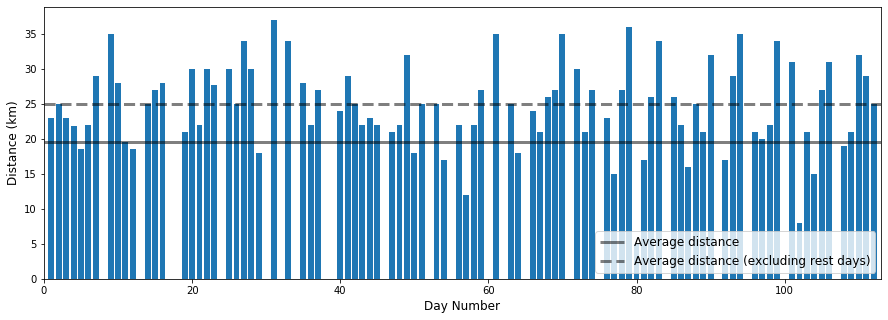

In [527]:
plt.figure(figsize=(15,5))
plt.bar(df.Day_number,df.Distance_km)
plt.xlim(0,113)
plt.xlabel("Day Number",fontsize=12)
plt.ylabel("Distance (km)", fontsize=12)

avg_distance = np.mean(df.Distance_km)
avg_distance_exc_rest = np.mean(df[df.Distance_km>5].Distance_km)
plt.hlines(avg_distance,0,113,color='k',alpha=0.5,label="Average distance",linewidths=3)
plt.hlines(avg_distance_exc_rest,0,113,linestyle="--",color='k',alpha=0.5,
           label="Average distance (excluding rest days)",linewidths=3)
plt.legend(loc='lower right',fontsize=12);

In [489]:
def draw_brace(ax, xspan, yy, text, font_size):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 300./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.05*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=1)

    ax.text((xmax+xmin)/2., yy+.09*yspan, text, ha='center', va='bottom', fontsize=font_size)

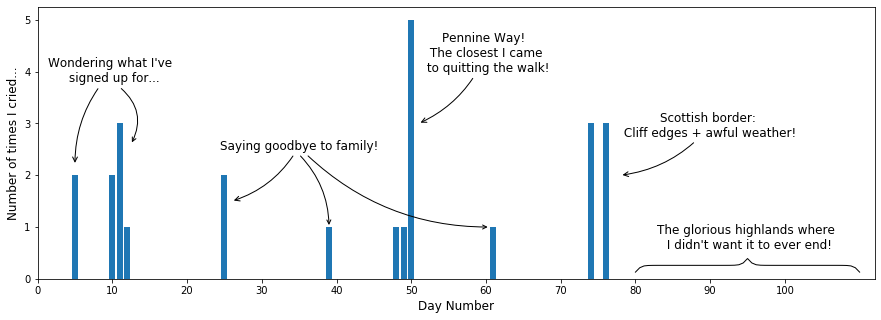

In [495]:
font_size = 12

plt.figure(figsize=(15,5))
plt.bar(df.Day_number,df.Cries)
plt.xlim(0,112)
plt.xlabel("Day Number",fontsize=font_size)
plt.ylabel("Number of times I cried...",fontsize=font_size)
plt.xticks(np.arange(0,110,10))


plt.annotate("Wondering what I've \n signed up for...", xy=(5,2.2), xytext=(10,3.8),
             horizontalalignment='center', fontsize=font_size,
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.2'})
plt.annotate("", xy=(12.5,2.6), xytext=(11,3.7),horizontalalignment='center',
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=-0.4'})

plt.annotate("Saying goodbye to family!", xy=(26,1.5), xytext=(35,2.5),
             horizontalalignment='center', fontsize=font_size,
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=-0.2'})
plt.annotate("", xy=(39,1), xytext=(35,2.4),horizontalalignment='center',
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=-0.2'})
plt.annotate("", xy=(60.5,1), xytext=(36,2.4),horizontalalignment='center',
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.2'})

plt.annotate("Pennine Way! \n The closest I came \n to quitting the walk!",
             xy=(51,3), xytext=(60,4),horizontalalignment='center', fontsize=font_size,
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=-0.2'})

plt.annotate("Scottish border: \n Cliff edges + awful weather! ",
             xy=(78,2), xytext=(90,2.75),horizontalalignment='center', fontsize=font_size,
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=-0.2'})

ax = plt.gca()
draw_brace(ax, (80, 110), 0.05, "The glorious highlands where \n I didn't want it to ever end!", font_size)

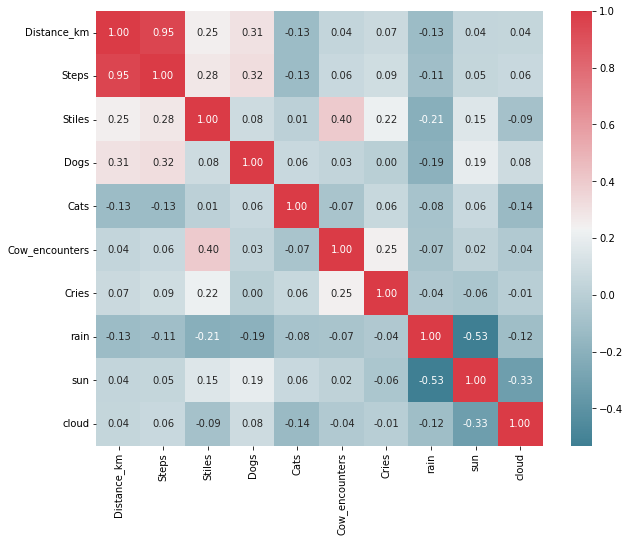

In [385]:
columns_for_correlation = ["Distance_km", "Steps", "Stiles", "Dogs", "Cats", "Cow_encounters", "Cries","Chickens", 
                           "rain", "sun", "cloud"]

correlation_matrix = df[columns_for_correlation].corr()

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f");

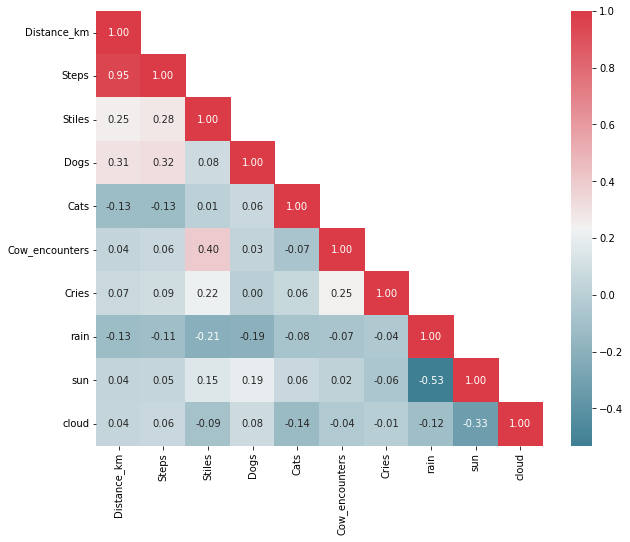

In [381]:
columns_for_correlation = ["Distance_km", "Steps", "Stiles", "Dogs", "Cats", "Cow_encounters", "Cries","Chickens", "rain", "sun", "cloud"]

correlation_matrix = df[columns_for_correlation].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
mask[np.diag_indices_from(mask)] = False

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", mask=mask);

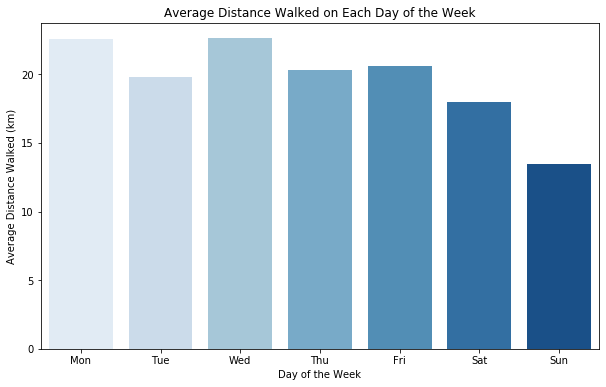

In [382]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Set the figure size
plt.figure(figsize=(10, 6))

# Calculate the average distance walked on each day of the week
average_distance_per_day = df.groupby('Day_week')['Distance_km'].mean().reset_index()

# Plot the average distance walked on each day of the week with specified order
sns.barplot(x='Day_week', y='Distance_km', data=average_distance_per_day, order=day_order, palette='Blues')
plt.title('Average Distance Walked on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Distance Walked (km)');

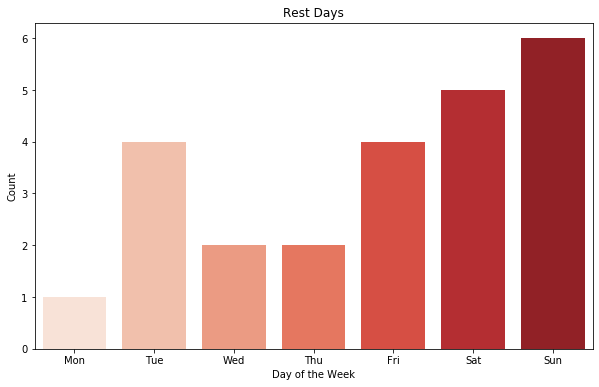

In [383]:
df_rest_days = df[df['Distance_km'] <= 5]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the number of times walked less than or equal to 5km by day of the week
sns.countplot(x='Day_week', data=df_rest_days, order=day_order, palette='Reds')
plt.title('Rest Days')
plt.xlabel('Day of the Week')
plt.ylabel('Count');